<a href="https://colab.research.google.com/github/Izuho/NumSimulation-of-flow/blob/main/ShowFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cp /content/drive/MyDrive/outer.dat outer.dat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.animation import PillowWriter

In [3]:
mat = []  # 結果を入れるリスト(行列)

with open('outer.dat', 'r') as fin:  # ファイルを開く
    for line in fin.readlines():  # 行をすべて読み込んで1行ずつfor文で回す
        row = []  # 行のデータを保存するリスト
        toks = line.split(' ')  # 行を半角スペースで分割する
        for tok in toks:  # 分割したトークン列を回す
            try:
                # from IPython.core.debugger import Pdb; Pdb().set_trace()
                num = float(tok)
                row.append(num)  # 行に保存
            except ValueError:
                continue  # スキップ
        # print(row)
        if row != []:
            row = np.array(row)
            mat.append(row)  # 行をnumsに保存
    mat = np.array(mat)

In [4]:
uvtemp = mat.reshape((3000, 3, 12, 12))

/usr/local/lib/python3.7/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr/local/lib/python3.7/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


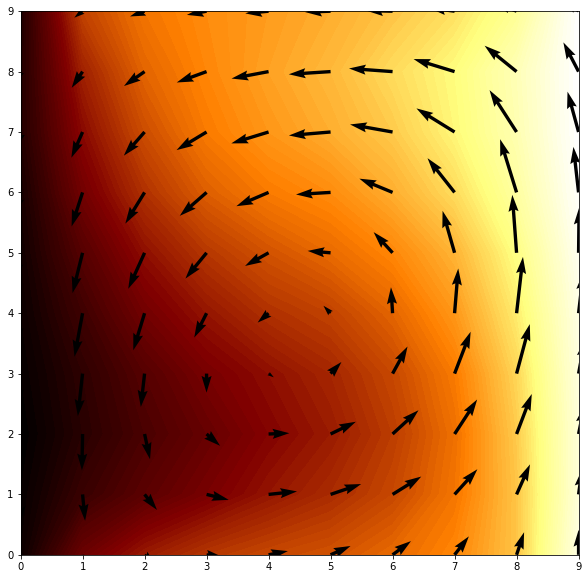

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
ims = []
ims2 = []

for index in range(0,3000,100):
    X = np.arange(10)
    Y = np.arange(10)
    im = ax.contourf(X, Y, uvtemp[index, 2, 1:11, 1:11], levels=100, cmap = 'afmhot')
    im2 = ax.quiver(X, Y[::-1], uvtemp[index, 0, 1:11, 1:11], uvtemp[index, 1, 1:11, 1:11])
    ims.append(im.collections + [im2])
    '''
    if index % 10 == 0:
        print("%.2f percent finished!"% (index / 500 * 100))
    '''

In [6]:
anim = animation.ArtistAnimation(fig, ims)

# Google Colaboratoryの場合必要
rc('animation', html='jshtml')
plt.close()
anim

/usr/local/lib/python3.7/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr/local/lib/python3.7/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


In [ ]:
anim = animation.ArtistAnimation(fig, ims)

# Google Colaboratoryの場合必要
rc('animation', html='jshtml')
plt.close()
anim.save('test.gif', writer='pillow')

/usr/local/lib/python3.7/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr/local/lib/python3.7/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
